In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
mpl.style.use('seaborn-darkgrid')
base_color='#436BAD'
red_color='#990000'

In [6]:
states_all = pd.read_csv("states_all.csv")
states_all_ex = pd.read_csv("states_all_extended.csv")

In [21]:
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [24]:
states_all.shape

(1715, 25)

In [30]:
states_all.nunique()

PRIMARY_KEY                     1715
STATE                             53
YEAR                              33
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1483
GRADES_KG_G                     1613
GRADES_4_G                      1612
GRADES_8_G                      1620
GRADES_12_G                     1608
GRADES_1_8_G                    1020
GRADES_9_12_G                   1070
GRADES_ALL_G                    1629
AVG_MATH_4_SCORE                  50
AVG_MATH_8_SCORE                  57
AVG_READING_4_SCORE               43
AVG_READING_8_SCORE               39
dtype: int64

In [32]:
states_all.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

It looks like the data set includes every US state + District of Columbia, DODEA, and National makin gup 53 unique states in the dataset. 

In [7]:
states_all_ex.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for col in states_all_ex.columns:
    print(col)

PRIMARY_KEY
STATE
YEAR
ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
A_A_A
G01_A_A
G02_A_A
G03_A_A
G04_A_A
G05_A_A
G06_A_A
G07_A_A
G08_A_A
G09_A_A
G10_A_A
G11_A_A
G12_A_A
KG_A_A
PK_A_A
G01-G08_A_A
G09-G12_A_A
G01_AM_F
G01_AM_M
G01_AS_F
G01_AS_M
G01_BL_F
G01_BL_M
G01_HI_F
G01_HI_M
G01_HP_F
G01_HP_M
G01_TR_F
G01_TR_M
G01_WH_F
G01_WH_M
G02_AM_F
G02_AM_M
G02_AS_F
G02_AS_M
G02_BL_F
G02_BL_M
G02_HI_F
G02_HI_M
G02_HP_F
G02_HP_M
G02_TR_F
G02_TR_M
G02_WH_F
G02_WH_M
G03_AM_F
G03_AM_M
G03_AS_F
G03_AS_M
G03_BL_F
G03_BL_M
G03_HI_F
G03_HI_M
G03_HP_F
G03_HP_M
G03_TR_F
G03_TR_M
G03_WH_F
G03_WH_M
G04_AM_F
G04_AM_M
G04_AS_F
G04_AS_M
G04_BL_F
G04_BL_M
G04_HI_F
G04_HI_M
G04_HP_F
G04_HP_M
G04_TR_F
G04_TR_M
G04_WH_F
G04_WH_M
G05_AM_F
G05_AM_M
G05_AS_F
G05_AS_M
G05_BL_F
G05_BL_M
G05_HI_F
G05_HI_M
G05_HP_F
G05_HP_M
G05_TR_F
G05_TR_M
G05_WH_F
G05_WH_M
G06_AM_F
G06_AM_M
G06_AS_F

In [12]:
for col in states_all.columns:
    print(col)

PRIMARY_KEY
STATE
YEAR
ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
GRADES_PK_G
GRADES_KG_G
GRADES_4_G
GRADES_8_G
GRADES_12_G
GRADES_1_8_G
GRADES_9_12_G
GRADES_ALL_G
AVG_MATH_4_SCORE
AVG_MATH_8_SCORE
AVG_READING_4_SCORE
AVG_READING_8_SCORE


                              Count  Percent
AVG_READING_8_SCORE            1153    67.23
AVG_MATH_4_SCORE               1150    67.06
AVG_MATH_8_SCORE               1113    64.90
AVG_READING_4_SCORE            1065    62.10
GRADES_1_8_G                    695    40.52
GRADES_9_12_G                   644    37.55
OTHER_EXPENDITURE               491    28.63
ENROLL                          491    28.63
SUPPORT_SERVICES_EXPENDITURE    440    25.66
CAPITAL_OUTLAY_EXPENDITURE      440    25.66
TOTAL_REVENUE                   440    25.66
INSTRUCTION_EXPENDITURE         440    25.66
TOTAL_EXPENDITURE               440    25.66
LOCAL_REVENUE                   440    25.66
STATE_REVENUE                   440    25.66
FEDERAL_REVENUE                 440    25.66
GRADES_PK_G                     173    10.09
GRADES_4_G                       83     4.84
GRADES_8_G                       83     4.84
GRADES_12_G                      83     4.84
GRADES_ALL_G                     83     4.84
GRADES_KG_

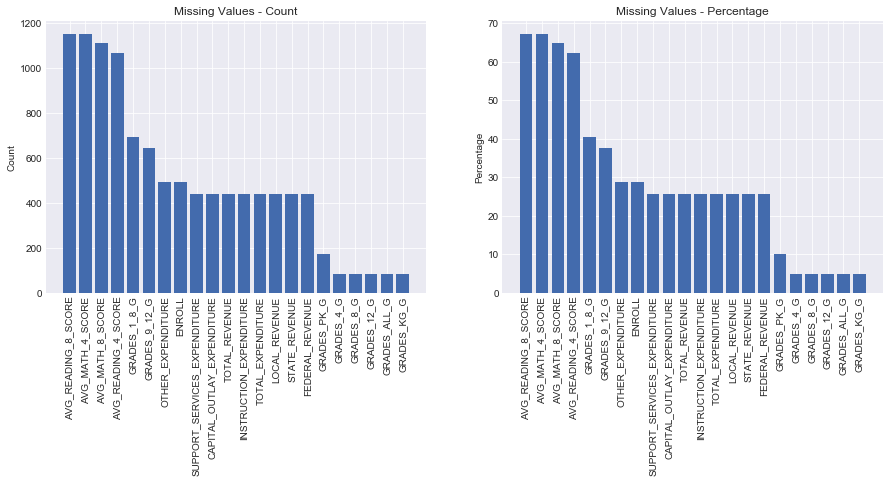

In [16]:
def missing_values(data):
    data_missing = data.isnull().sum()
    data_missing = pd.DataFrame(data_missing[data_missing > 0])
    data_missing.columns = ['Count']
    data_missing.sort_values(by='Count', ascending = False, inplace=True)
    data_missing['Percent'] = round((data_missing['Count'] /  len(data.index))* 100, 2) 
    plt.figure(figsize=(15, 5))   
    plt.subplot(1,2, 1)
    print(data_missing)
    plt.bar(data_missing.index,data_missing['Count'],color=base_color)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Missing Values - Count')
    plt.subplot(1,2, 2)
    plt.bar(data_missing.index,data_missing['Percent'],color=base_color)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    plt.title('Missing Values - Percentage')

missing_values(states_all)

In [35]:
states_all[states_all["AVG_READING_8_SCORE"].isnull()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,1994_DODEA,DODEA,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,1996_DODEA,DODEA,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,1996_NATIONAL,NATIONAL,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,224.0,270.0,NaN,NaN
1642,2000_DODEA,DODEA,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,227.0,277.0,NaN,NaN


In [37]:
states_all[states_all["STATE"]== "DODEA"]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1632,1990_DODEA,DODEA,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,1992_DODEA,DODEA,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1636,1994_DODEA,DODEA,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,1996_DODEA,DODEA,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640,1998_DODEA,DODEA,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,269.0
1642,2000_DODEA,DODEA,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,227.0,277.0,NaN,NaN
1644,2002_DODEA,DODEA,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.0,273.0
1646,2003_DODEA,DODEA,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.0,285.0,224.0,272.0
1648,2005_DODEA,DODEA,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,239.0,284.0,226.0,271.0
1650,2007_DODEA,DODEA,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,285.0,229.0,273.0


In [38]:
states_all[states_all["STATE"]== "NATIONAL"]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1633,1990_NATIONAL,NATIONAL,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,213.0,263.0,NaN,NaN
1635,1992_NATIONAL,NATIONAL,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,220.0,268.0,217.0,260.0
1637,1994_NATIONAL,NATIONAL,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.0,260.0
1639,1996_NATIONAL,NATIONAL,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,224.0,270.0,NaN,NaN
1641,1998_NATIONAL,NATIONAL,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.0,263.0
1643,2000_NATIONAL,NATIONAL,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,226.0,273.0,213.0,NaN
1645,2002_NATIONAL,NATIONAL,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,264.0
1647,2003_NATIONAL,NATIONAL,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,278.0,218.0,263.0
1649,2005_NATIONAL,NATIONAL,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,238.0,279.0,219.0,262.0
1651,2007_NATIONAL,NATIONAL,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,281.0,221.0,263.0


In [39]:
states_all[states_all["STATE"]== "ALABAMA"]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,NaN,NaN,734288.0,NaN,NaN,NaN,NaN
102,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,NaN,NaN,736531.0,NaN,NaN,208.0,NaN
153,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,NaN,NaN,746149.0,NaN,NaN,NaN,NaN
204,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,NaN,NaN,747932.0,NaN,NaN,NaN,NaN
255,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,749207.0,NaN,NaN,NaN,NaN
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
357,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,740732.0,NaN,NaN,NaN,NaN
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.0,264.0,NaN,NaN
459,2001_ALABAMA,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,...,58929.0,56591.0,42909.0,469591.0,201610.0,737190.0,NaN,NaN,NaN,NaN


In [77]:
states_new = states_all [(states_all["YEAR"] > 1999) & (states_all["YEAR"] < 2017)]

In [78]:
states_new.shape

(885, 25)

                              Count  Percent
AVG_MATH_8_SCORE                472    53.33
AVG_MATH_4_SCORE                471    53.22
AVG_READING_8_SCORE             470    53.11
AVG_READING_4_SCORE             467    52.77
GRADES_PK_G                      23     2.60
GRADES_4_G                       18     2.03
GRADES_ALL_G                     18     2.03
GRADES_9_12_G                    18     2.03
GRADES_1_8_G                     18     2.03
GRADES_12_G                      18     2.03
GRADES_8_G                       18     2.03
ENROLL                           18     2.03
TOTAL_REVENUE                    18     2.03
CAPITAL_OUTLAY_EXPENDITURE       18     2.03
OTHER_EXPENDITURE                18     2.03
SUPPORT_SERVICES_EXPENDITURE     18     2.03
INSTRUCTION_EXPENDITURE          18     2.03
TOTAL_EXPENDITURE                18     2.03
LOCAL_REVENUE                    18     2.03
STATE_REVENUE                    18     2.03
FEDERAL_REVENUE                  18     2.03
GRADES_KG_

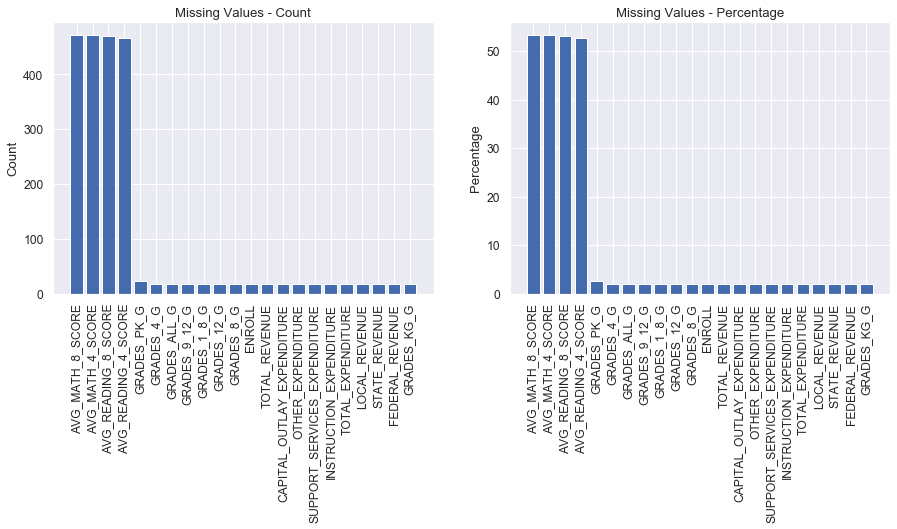

In [79]:
missing_values(states_new)

In [80]:
def formatCols(mylist, cols):
    lines = ("\t".join(mylist[i:i+cols]) for i in range(0,len(mylist),cols))
    return '\n'.join(lines)
numerical_cols = states_all.select_dtypes(exclude=['object'])
categorical_cols = states_all.select_dtypes(include=['object'])
print('Numeric columns info:')
print('Total:', len(numerical_cols.columns))
print(formatCols( numerical_cols.columns, 23))
print('\n')
print('Categorical columns info:')
print('Total:', len(categorical_cols.columns))
print(formatCols( categorical_cols.columns, 6))


Numeric columns info:
Total: 23
YEAR	ENROLL	TOTAL_REVENUE	FEDERAL_REVENUE	STATE_REVENUE	LOCAL_REVENUE	TOTAL_EXPENDITURE	INSTRUCTION_EXPENDITURE	SUPPORT_SERVICES_EXPENDITURE	OTHER_EXPENDITURE	CAPITAL_OUTLAY_EXPENDITURE	GRADES_PK_G	GRADES_KG_G	GRADES_4_G	GRADES_8_G	GRADES_12_G	GRADES_1_8_G	GRADES_9_12_G	GRADES_ALL_G	AVG_MATH_4_SCORE	AVG_MATH_8_SCORE	AVG_READING_4_SCORE	AVG_READING_8_SCORE


Categorical columns info:
Total: 2
PRIMARY_KEY	STATE


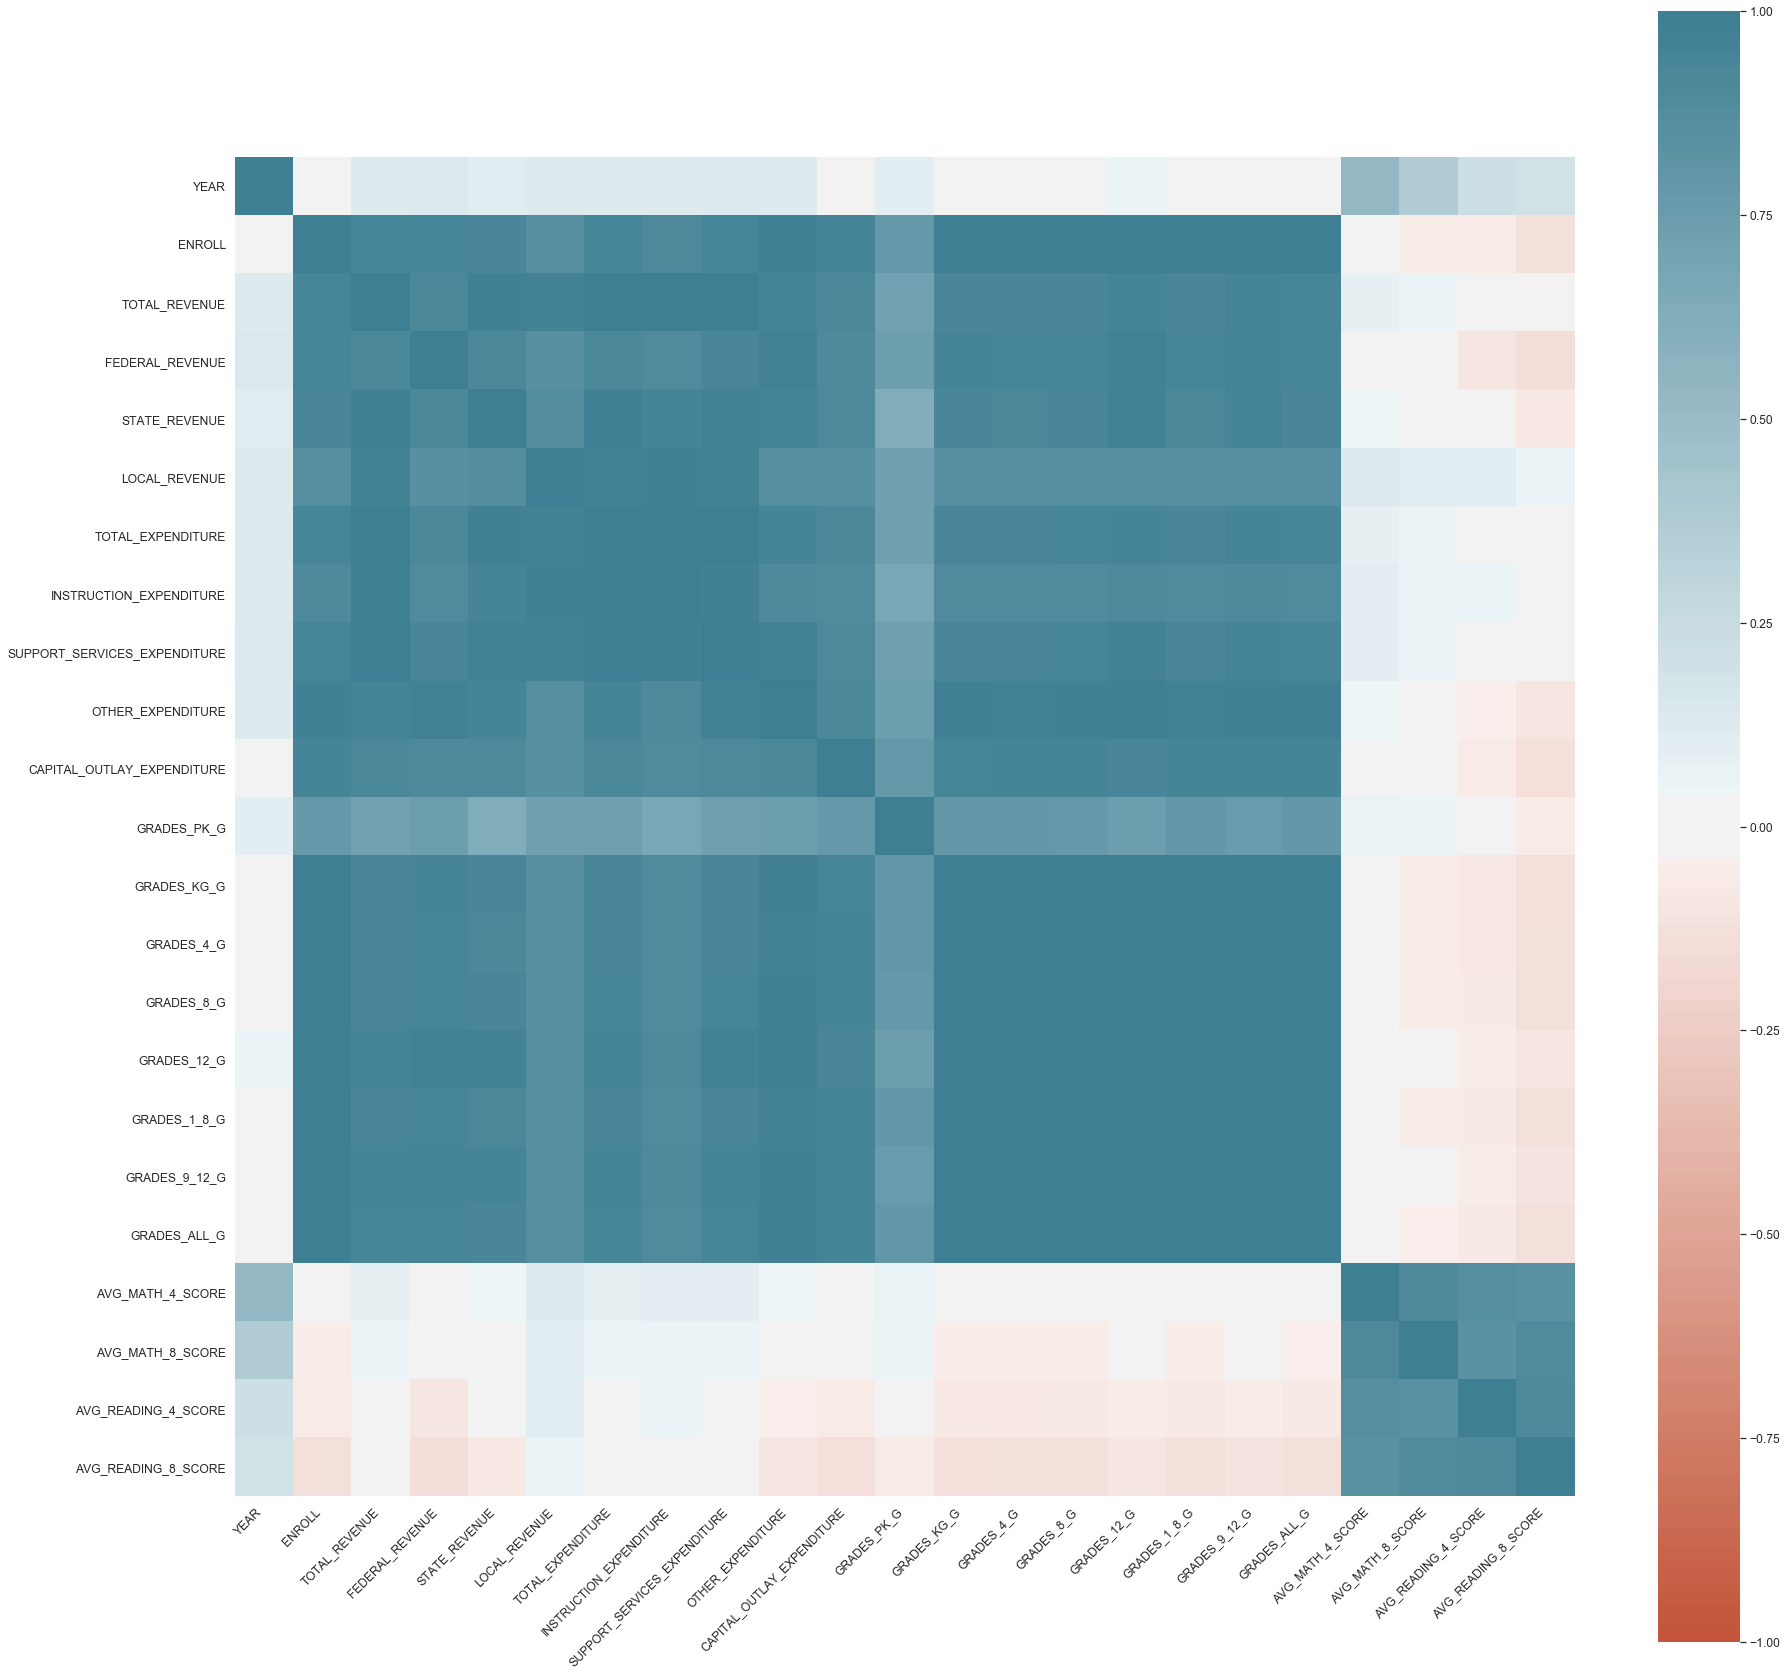

In [81]:
corr = states_new.corr()
plt.figure(figsize= (30,30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Interesting question: Which revenue type is most correlated with test scores? 

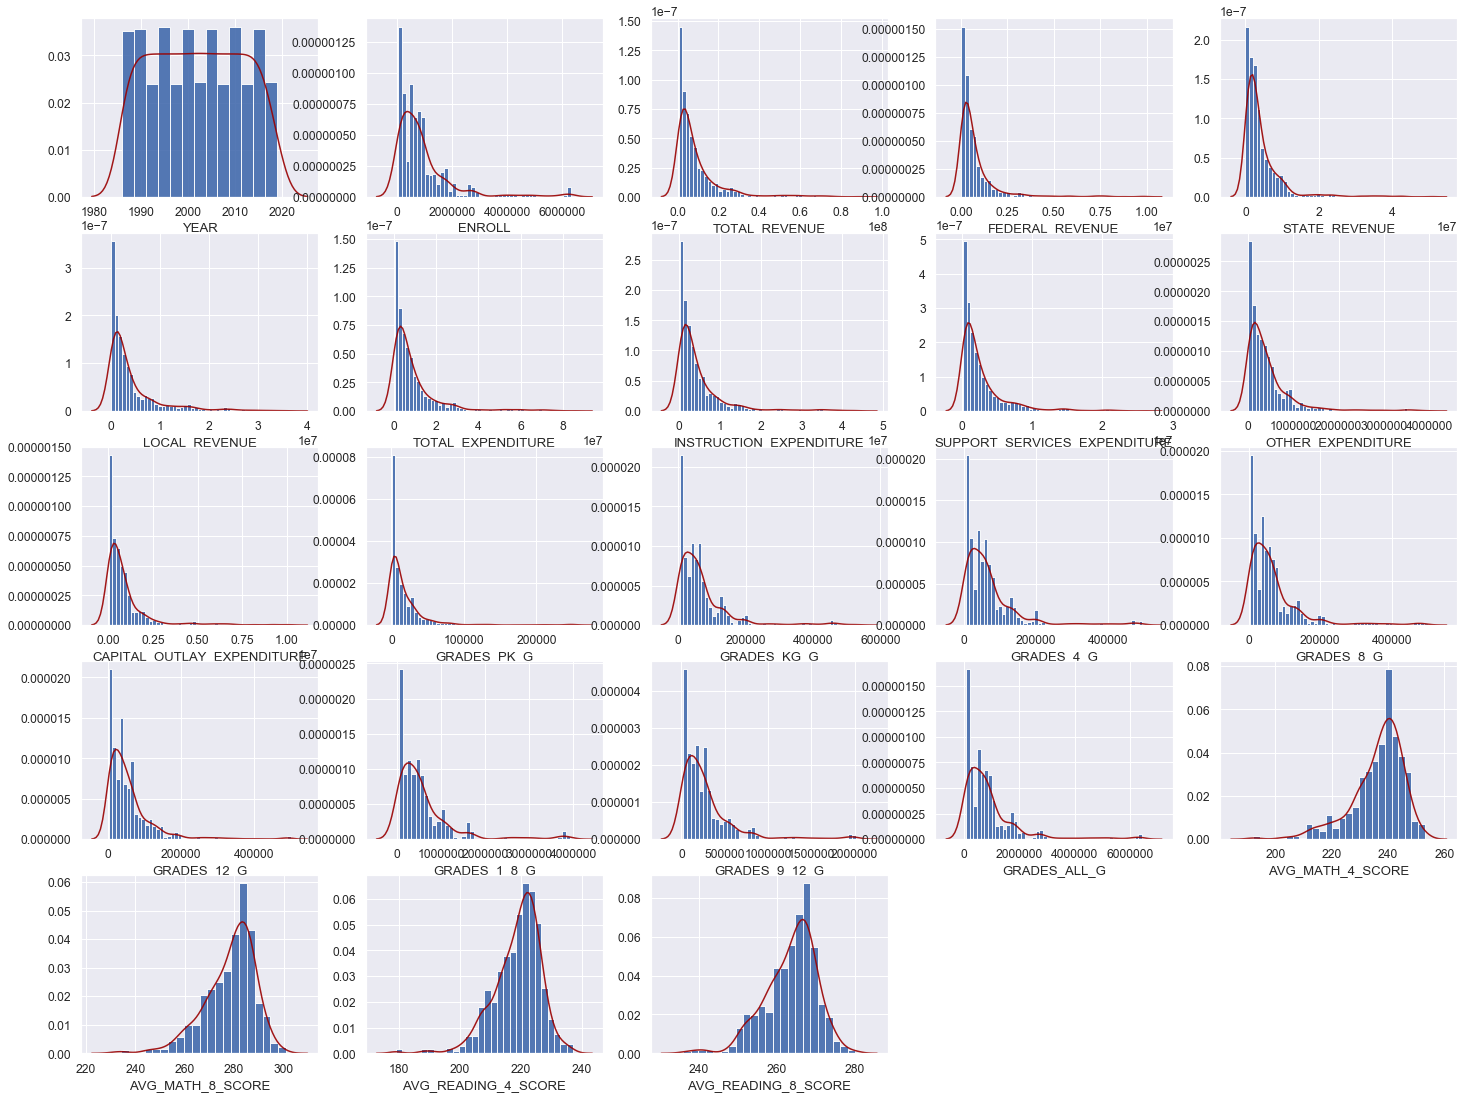

In [82]:
fig, axes = plt.subplots(figsize=(20,30))
fig.tight_layout()
cell_no = 1
for column_name in numerical_cols.columns:     
    plt.subplot(10, 5, cell_no)
    sns.distplot(numerical_cols[column_name], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9},label=column_name)
    cell_no+=1

LOOKING CLOSER INTO SOME OF THE SKEWED FEATURES...

In [83]:
states_new["TOTAL_EXPENDITURE"].describe()

count    8.670000e+02
mean     1.085521e+07
std      1.350638e+07
min      7.699230e+05
25%      2.624235e+06
50%      6.317635e+06
75%      1.214272e+07
max      8.532013e+07
Name: TOTAL_EXPENDITURE, dtype: float64

In [84]:
states_new["TOTAL_REVENUE"].describe()

count    8.670000e+02
mean     1.073519e+07
std      1.322759e+07
min      7.873230e+05
25%      2.659006e+06
50%      6.192222e+06
75%      1.242799e+07
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64

In [85]:
states_new["ENROLL"].describe()

count    8.670000e+02
mean     9.408038e+05
std      1.106274e+06
min      4.386600e+04
25%      2.700105e+05
50%      6.642000e+05
75%      1.027190e+06
max      6.307022e+06
Name: ENROLL, dtype: float64

### Looking specifically at how scores have grown over time...

Text(0.5, 1.0, 'Math 4 Score 2000-2016')

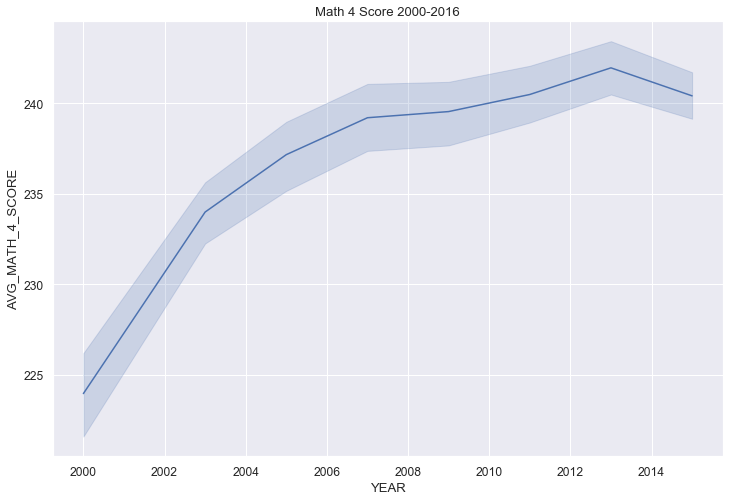

In [91]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='YEAR', y='AVG_MATH_4_SCORE', data=states_new).set_title("Math 4 Score 2000-2016")

Text(0.5, 1.0, 'Reading 4 Score 2000-2016')

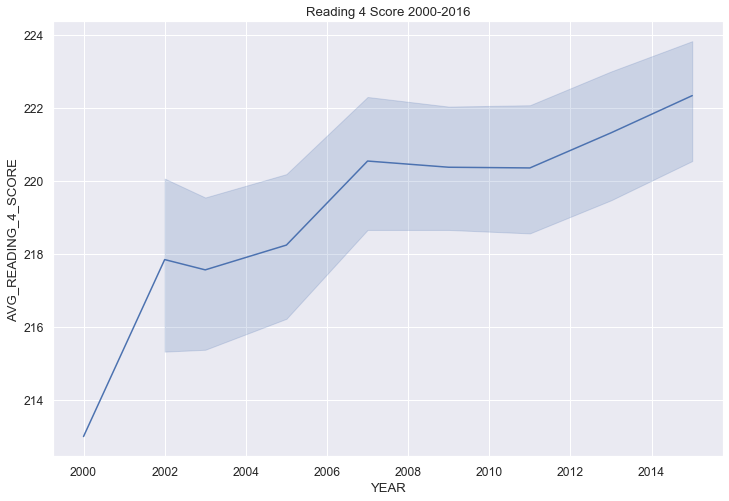

In [92]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='YEAR', y='AVG_READING_4_SCORE', data=states_new).set_title("Reading 4 Score 2000-2016")

Text(0.5, 1.0, 'Reading 8 Score 2000-2016')

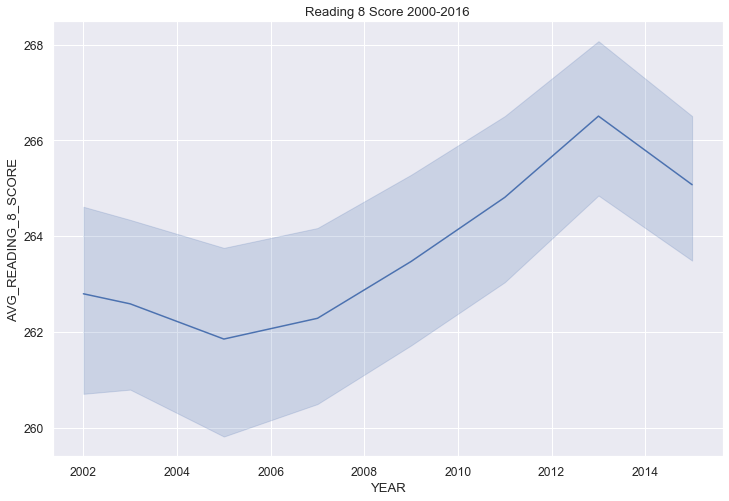

In [93]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='YEAR', y='AVG_READING_8_SCORE', data=states_new).set_title("Reading 8 Score 2000-2016")

Text(0.5, 1.0, 'Math 8 Score 2000-2016')

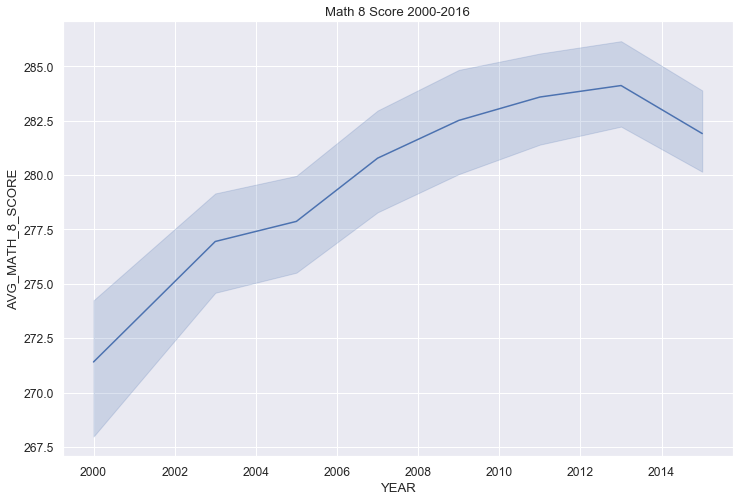

In [94]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='YEAR', y='AVG_MATH_8_SCORE', data=states_new).set_title("Math 8 Score 2000-2016")

In [95]:
states_ex_new = states_all_ex [(states_all_ex["YEAR"] > 1999) & (states_all_ex["YEAR"] < 2017)]

In [98]:
states_ex_new.shape

(885, 266)

In [105]:
for col in states_ex_new.columns:
    print (col)

PRIMARY_KEY
STATE
YEAR
ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
A_A_A
G01_A_A
G02_A_A
G03_A_A
G04_A_A
G05_A_A
G06_A_A
G07_A_A
G08_A_A
G09_A_A
G10_A_A
G11_A_A
G12_A_A
KG_A_A
PK_A_A
G01-G08_A_A
G09-G12_A_A
G01_AM_F
G01_AM_M
G01_AS_F
G01_AS_M
G01_BL_F
G01_BL_M
G01_HI_F
G01_HI_M
G01_HP_F
G01_HP_M
G01_TR_F
G01_TR_M
G01_WH_F
G01_WH_M
G02_AM_F
G02_AM_M
G02_AS_F
G02_AS_M
G02_BL_F
G02_BL_M
G02_HI_F
G02_HI_M
G02_HP_F
G02_HP_M
G02_TR_F
G02_TR_M
G02_WH_F
G02_WH_M
G03_AM_F
G03_AM_M
G03_AS_F
G03_AS_M
G03_BL_F
G03_BL_M
G03_HI_F
G03_HI_M
G03_HP_F
G03_HP_M
G03_TR_F
G03_TR_M
G03_WH_F
G03_WH_M
G04_AM_F
G04_AM_M
G04_AS_F
G04_AS_M
G04_BL_F
G04_BL_M
G04_HI_F
G04_HI_M
G04_HP_F
G04_HP_M
G04_TR_F
G04_TR_M
G04_WH_F
G04_WH_M
G05_AM_F
G05_AM_M
G05_AS_F
G05_AS_M
G05_BL_F
G05_BL_M
G05_HI_F
G05_HI_M
G05_HP_F
G05_HP_M
G05_TR_F
G05_TR_M
G05_WH_F
G05_WH_M
G06_AM_F
G06_AM_M
G06_AS_F

In [113]:
# for row in states_ex_new:    
#     states_ex_new["G01_AM"] = states_ex_new["G01_AM_F"] + states_ex_new["G01_AM_M"]
#     states_ex_new["G01_AS"] = states_ex_new["G01_AS_F"] + states_ex_new["G01_AS_M"]
#     states_ex_new["G01_BL"] = states_ex_new["G01_BL_F"] + states_ex_new["G01_BL_M"]
#     states_ex_new["G01_HI"] = states_ex_new["G01_HI_F"] + states_ex_new["G01_HI_M"]
#     states_ex_new["G01_HP"] = states_ex_new["G01_HP_F"] + states_ex_new["G01_HP_M"]
#     states_ex_new["G01_TR"] = states_ex_new["G01_TR_F"] + states_ex_new["G01_TR_M"]
#     states_ex_new["G01_WH"] = states_ex_new["G01_WH_F"] + states_ex_new["G01_WH_M"]


#     states_ex_new["G02_AM"] = states_ex_new["G02_AM_F"] + states_ex_new["G02_AM_M"]
#     states_ex_new["G02_AS"] = states_ex_new["G02_AS_F"] + states_ex_new["G02_AS_M"]
#     states_ex_new["G02_BL"] = states_ex_new["G02_BL_F"] + states_ex_new["G02_BL_M"]
#     states_ex_new["G02_HI"] = states_ex_new["G02_HI_F"] + states_ex_new["G02_HI_M"]
#     states_ex_new["G02_HP"] = states_ex_new["G02_HP_F"] + states_ex_new["G02_HP_M"]
#     states_ex_new["G02_TR"] = states_ex_new["G02_TR_F"] + states_ex_new["G02_TR_M"]
#     states_ex_new["G02_WH"] = states_ex_new["G02_WH_F"] + states_ex_new["G02_WH_M"]

states_ex_new["G03_AM"] = states_ex_new["G03_AM_F"] + states_ex_new["G03_AM_M"]
states_ex_new["G03_AS"] = states_ex_new["G03_AS_F"] + states_ex_new["G03_AS_M"]
states_ex_new["G03_BL"] = states_ex_new["G03_BL_F"] + states_ex_new["G03_BL_M"]
states_ex_new["G03_HI"] = states_ex_new["G03_HI_F"] + states_ex_new["G03_HI_M"]
states_ex_new["G03_HP"] = states_ex_new["G03_HP_F"] + states_ex_new["G03_HP_M"]
states_ex_new["G03_TR"] = states_ex_new["G03_TR_F"] + states_ex_new["G03_TR_M"]
states_ex_new["G03_WH"] = states_ex_new["G03_WH_F"] + states_ex_new["G03_WH_M"]

states_ex_new["G04_AM"] = states_ex_new["G04_AM_F"] + states_ex_new["G04_AM_M"]
states_ex_new["G04_AS"] = states_ex_new["G04_AS_F"] + states_ex_new["G04_AS_M"]
states_ex_new["G04_BL"] = states_ex_new["G04_BL_F"] + states_ex_new["G04_BL_M"]
states_ex_new["G04_HI"] = states_ex_new["G04_HI_F"] + states_ex_new["G04_HI_M"]
states_ex_new["G04_HP"] = states_ex_new["G04_HP_F"] + states_ex_new["G04_HP_M"]
states_ex_new["G04_TR"] = states_ex_new["G04_TR_F"] + states_ex_new["G04_TR_M"]
states_ex_new["G04_WH"] = states_ex_new["G04_WH_F"] + states_ex_new["G04_WH_M"]

/Users/alliegodfrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/alliegodfrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/alliegodfrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

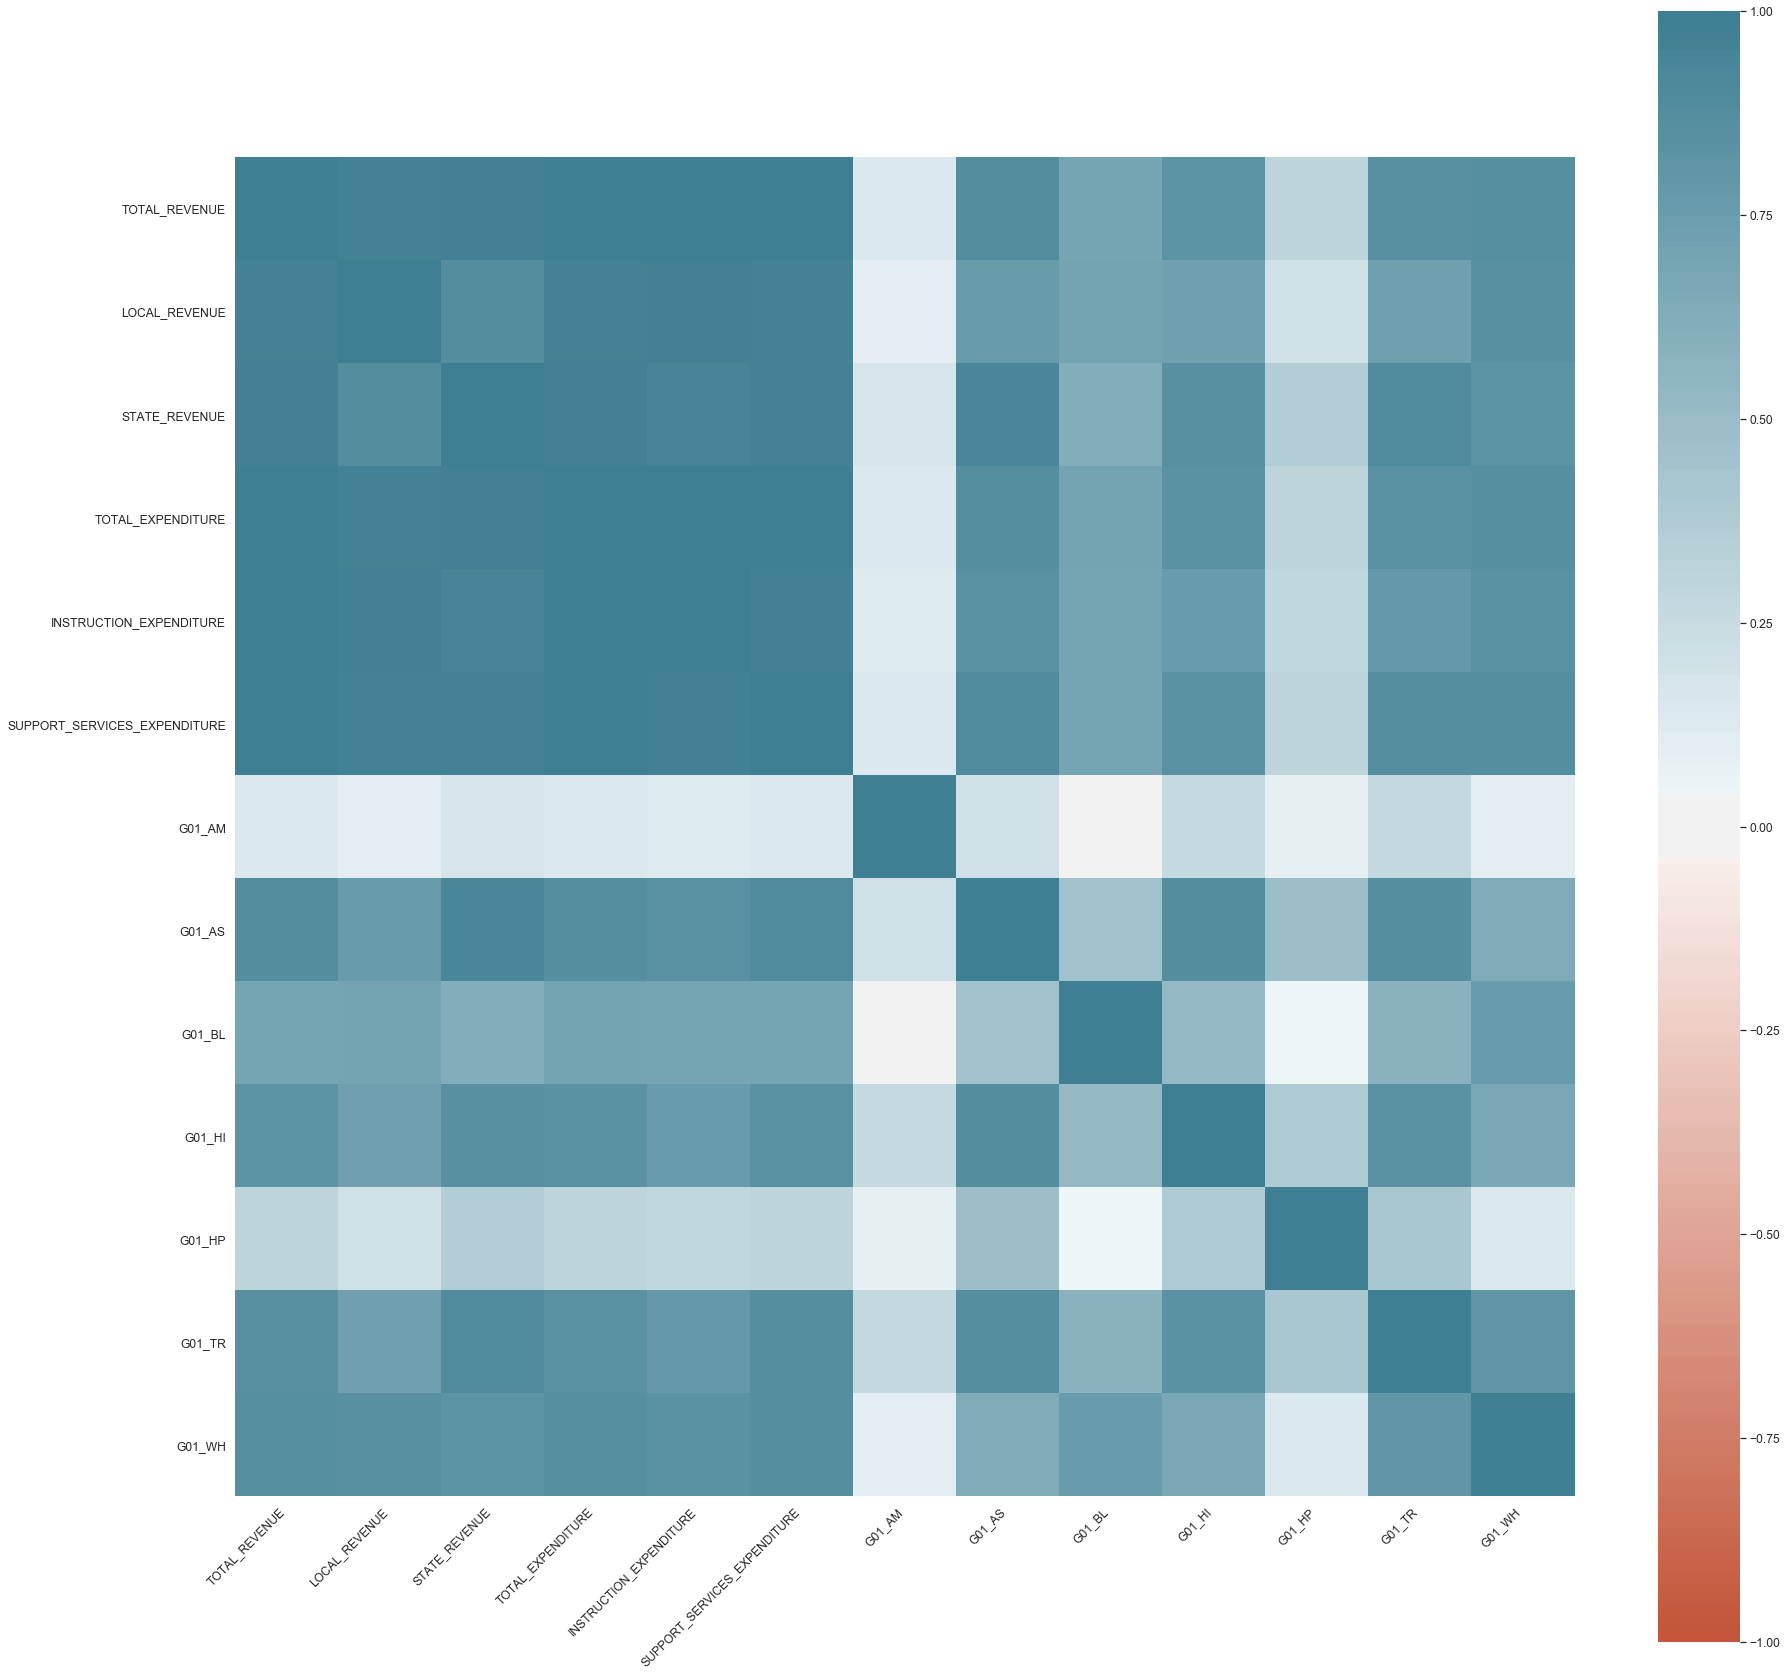

In [109]:
states_corr_cols = ["STATE", "TOTAL_REVENUE", "LOCAL_REVENUE", "STATE_REVENUE", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
"SUPPORT_SERVICES_EXPENDITURE", "G01_AM", "G01_AS", "G01_BL","G01_HI", "G01_HP","G01_TR", "G01_WH"]
corr = states_ex_new[states_corr_cols].corr()
plt.figure(figsize= (30,30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [114]:
states_ex_new.to_csv("states_ex_new.csv")